## Import librairies

In [1]:
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

c:\Users\33760\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get data : get around pricing project

In [2]:
df_pricing = pd.read_csv('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv', index_col=[0])
df_pricing.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [3]:
# Download file
url = 'https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv'
response = requests.get(url)

with open('get_around_pricing_project.csv', 'wb') as file:
    file.write(response.content)


In [4]:
# Create a Dataframe copy
df_pricing_copy = df_pricing.copy()

## EDA : Pricing Analysis

In [5]:
# Shape of the dataset
df_pricing.shape

print(f'This dataset contains {df_pricing.shape[0]} rows' )
print(f'\nThis dataset contains {df_pricing.shape[1]} columns' )

This dataset contains 4843 rows

This dataset contains 14 columns


In [6]:
# Get some informations about variables
df_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   int64 
dtypes: bool(

In [7]:
# Analysis some statistic metrics
df_pricing.describe(include = "all")

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [8]:
df_pricing.nunique()

model_key                      28
mileage                      4786
engine_power                   61
fuel                            4
paint_color                    10
car_type                        8
private_parking_available       2
has_gps                         2
has_air_conditioning            2
automatic_car                   2
has_getaround_connect           2
has_speed_regulator             2
winter_tires                    2
rental_price_per_day          220
dtype: int64

In [9]:
# Missing values rate by colmuns
missing_percentages = (df_pricing.isnull().sum() / df_pricing.shape[0] * 100).sort_values(ascending = False)
print(missing_percentages )

model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64


No missing values

# Discovery and distribution of categoricals variables

In [10]:
# Select categorical columns
cat_columns = [col for col in df_pricing.columns if df_pricing[col].dtype == 'object' or df_pricing[col].dtype == 'bool']
cat_columns

['model_key',
 'fuel',
 'paint_color',
 'car_type',
 'private_parking_available',
 'has_gps',
 'has_air_conditioning',
 'automatic_car',
 'has_getaround_connect',
 'has_speed_regulator',
 'winter_tires']

In [11]:
# Display unique values for selected columns
for column in cat_columns:
    unique_values = df_pricing[column].unique()
    print(f"Valeurs uniques de la colonne '{column}': {unique_values}\n")

Valeurs uniques de la colonne 'model_key': ['Citroën' 'Peugeot' 'PGO' 'Renault' 'Audi' 'BMW' 'Ford' 'Mercedes' 'Opel'
 'Porsche' 'Volkswagen' 'KIA Motors' 'Alfa Romeo' 'Ferrari' 'Fiat'
 'Lamborghini' 'Maserati' 'Lexus' 'Honda' 'Mazda' 'Mini' 'Mitsubishi'
 'Nissan' 'SEAT' 'Subaru' 'Suzuki' 'Toyota' 'Yamaha']

Valeurs uniques de la colonne 'fuel': ['diesel' 'petrol' 'hybrid_petrol' 'electro']

Valeurs uniques de la colonne 'paint_color': ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green']

Valeurs uniques de la colonne 'car_type': ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van']

Valeurs uniques de la colonne 'private_parking_available': [ True False]

Valeurs uniques de la colonne 'has_gps': [ True False]

Valeurs uniques de la colonne 'has_air_conditioning': [False  True]

Valeurs uniques de la colonne 'automatic_car': [False  True]

Valeurs uniques de la colonne 'has_getaround_connect': [ True False]

Valeurs uniques de la col

In [12]:
# Display all categorical features distribution
for column in cat_columns:
    fig = px.histogram(df_pricing, x = column, title = column, color = column, text_auto = True)
    fig.show()

## Distribution of numerical features

In [13]:
# Select categorical columns
num_columns = [col for col in df_pricing.columns if df_pricing[col].dtype == 'int64']
num_columns

['mileage', 'engine_power', 'rental_price_per_day']

In [14]:
# Declare a counter variable initialized to 0
counter = 0

# Loop through each numerical column to display the distribution
for column in num_columns:
    fig = px.histogram(df_pricing, x=column, title=column, text_auto=True)
    fig.show()
    
    # Increment the counter by 1 for each iteration
    counter += 1
    if counter > 2:
        break
    
    # Display the description using the counter to access the corresponding column
    print(df_pricing[num_columns[counter]].describe()) 

count    4843.00000
mean      128.98823
std        38.99336
min         0.00000
25%       100.00000
50%       120.00000
75%       135.00000
max       423.00000
Name: engine_power, dtype: float64


count    4843.000000
mean      121.214536
std        33.568268
min        10.000000
25%       104.000000
50%       119.000000
75%       136.000000
max       422.000000
Name: rental_price_per_day, dtype: float64


# outliers / underliers management

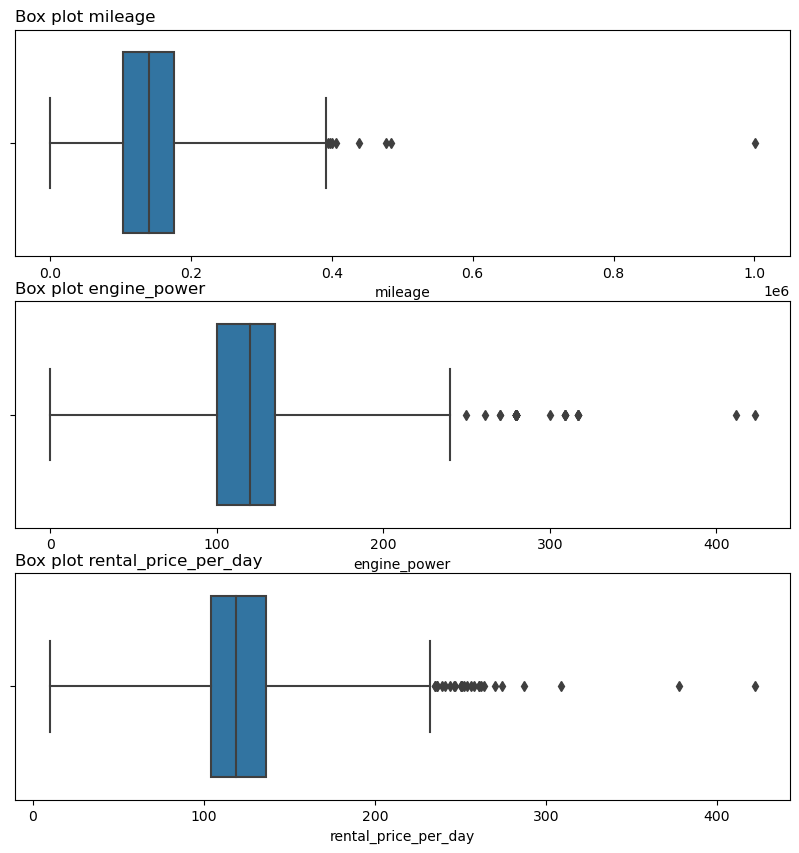

In [15]:
def plot_boxplot(column_name, axis_name, data):
    sns.boxplot(x=column_name, data=data, ax=axis_name, whis=3, fliersize=5)
    axis_name.set_title(f"Box plot {column_name}", loc='left')

# Initialize a figure with 2 sub-graphs on 2 line
fig, axes = plt.subplots(nrows=3, figsize=(10, 10))

# Create a boxplot for each axis using the function
plot_boxplot('mileage', axes[0], df_pricing)
plot_boxplot('engine_power', axes[1], df_pricing)
plot_boxplot('rental_price_per_day', axes[2], df_pricing)

We can noticed some Outliers into the numerical features.

In [16]:
# Manage outliers with Z score method (three standard deviations from the mean)
for column in num_columns:
    upper_bound = df_pricing[column].mean() + 3 * df_pricing[column].std()
    df_pricing = df_pricing[df_pricing[column] <= upper_bound]

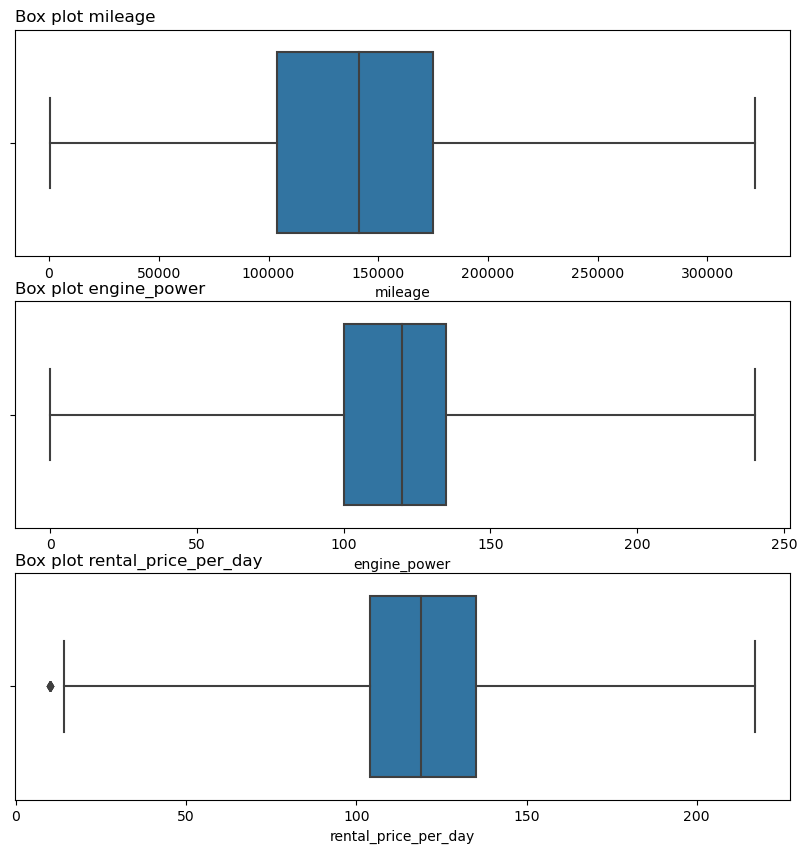

In [17]:
# Initialize a figure with 2 sub-graphs on 2 line (three standard deviations from the mean)
fig, axes = plt.subplots(nrows=3, figsize=(10, 10))

# Create a boxplot for each axis using the function
plot_boxplot('mileage', axes[0], df_pricing)
plot_boxplot('engine_power', axes[1], df_pricing)
plot_boxplot('rental_price_per_day', axes[2], df_pricing)

The removal of outliers triggered of a new underlier. It is necessary to take delete it

In [18]:
df_pricing.describe()

,mileage,engine_power,rental_price_per_day
count,4719.000000,4719.000000,4719.000000
mean,139662.004238,126.896588,120.084552
std,54305.586104,35.079923,30.214267
min,476.000000,0.000000,10.000000
25%,103678.000000,100.000000,104.000000
50%,141141.000000,120.000000,119.000000
75%,174839.500000,135.000000,135.000000
max,321498.000000,240.000000,217.000000


In [19]:
df_pricing.shape

(4719, 14)

In [20]:
# How many underliers equal to 10

count = df_pricing['rental_price_per_day'].value_counts()[10]
print("Nombre de valeurs égales à 10 :", count)

Nombre de valeurs égales à 10 : 6


In [21]:
# Create a mask 
underlier_deletion = 10
mask = df_pricing['rental_price_per_day'] != 10

# Apply the mask
df_pricing = df_pricing.loc[mask,:]

In [22]:
df_pricing.describe()

,mileage,engine_power,rental_price_per_day
count,4713.000000,4713.000000,4713.000000
mean,139651.885423,126.901125,120.224698
std,54325.648617,35.081659,29.976884
min,476.000000,0.000000,14.000000
25%,103673.000000,100.000000,104.000000
50%,141120.000000,120.000000,119.000000
75%,174862.000000,135.000000,135.000000
max,321498.000000,240.000000,217.000000


In [23]:
print('\nShape of new dataset:', df_pricing.shape)
print('\nAmount of data trimmed from first dataset: ', df_pricing_copy.shape[0] - df_pricing.shape[0])


Shape of new dataset: (4713, 14)

Amount of data trimmed from first dataset:  130


# Label distribution

In [24]:
fig = px.histogram(df_pricing, x = 'rental_price_per_day')
fig.show()

After managing the label outliers, the label seems to follow a Gaussian distribution. Which is a good thing in the context of a linear regression.

In [25]:
print('What is the most expensive car?\n')
mask_most_expensive_car = df_pricing.rental_price_per_day == df_pricing.rental_price_per_day.max()
df_pricing.loc[mask_most_expensive_car,:].transpose()

What is the most expensive car?



,3292,3741,4102,4116
model_key,Renault,Mitsubishi,Mitsubishi,Mitsubishi
mileage,52140,14052,68178,30689
engine_power,230,160,230,190
fuel,diesel,diesel,diesel,diesel
paint_color,blue,grey,black,black
car_type,sedan,suv,suv,suv
private_parking_available,True,True,True,True
has_gps,True,True,True,True
has_air_conditioning,True,True,True,True
automatic_car,False,False,True,True


In [26]:
print('What is the cheapest car?\n')
mask_cheapest_car = df_pricing.rental_price_per_day == df_pricing.rental_price_per_day.min()
df_pricing.loc[mask_cheapest_car,:].transpose()

What is the cheapest car?



,2473,2574,2611
model_key,Audi,Audi,Audi
mileage,230578,229880,230264
engine_power,85,85,85
fuel,diesel,diesel,diesel
paint_color,black,black,black
car_type,sedan,sedan,sedan
private_parking_available,False,False,False
has_gps,False,False,False
has_air_conditioning,False,False,False
automatic_car,False,False,False


## Relation Label VS features

In [27]:
fig = px.scatter(data_frame = df_pricing, x = 'mileage', y = 'rental_price_per_day', title = 'Mileage according to the location price per day')
fig.show()

It seems to have a correlation between Mileage and price

In [28]:
# Perform the correlation test
corr_coeff, p_value = stats.pearsonr(df_pricing['mileage'], df_pricing['rental_price_per_day'])

# Display the correlation coefficient and p-value
print("Correlation coefficient:", corr_coeff)
print("P-value:", p_value)

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level and reject or fail to reject H0
if p_value < alpha:
    print("The p-value is less than the significance level. Reject H0: There isn't relation between mileage and price.")
else:
    print("The p-value is greater than the significance level. Fail to reject H0.")


Correlation coefficient: -0.4176451225194319
P-value: 2.2966677228397167e-198
The p-value is less than the significance level. Reject H0: There isn't relation between mileage and price.


In [29]:
fig = px.scatter(data_frame = df_pricing, x = 'engine_power', y = 'rental_price_per_day', title = 'Engine power according to the location price per day')
fig.show()

In [30]:
# Perform the correlation test
corr_coeff2, p_value2 = stats.pearsonr(df_pricing['mileage'], df_pricing['rental_price_per_day'])

# Display the correlation coefficient and p-value
print("Correlation coefficient:", corr_coeff2)
print("P-value:", p_value2)

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level and reject or fail to reject H0
if p_value2 < alpha:
    print("The p-value is less than the significance level. Reject H0: There isn't relation between engine power level and price.")
else:
    print("The p-value is greater than the significance level. Fail to reject H0.")

Correlation coefficient: -0.4176451225194319
P-value: 2.2966677228397167e-198
The p-value is less than the significance level. Reject H0: There isn't relation between engine power level and price.


In [31]:
fig = px.histogram(data_frame = df_pricing, x = 'model_key', y = 'rental_price_per_day', histfunc = 'avg', color = 'model_key', title = 'Model key according to the location price per day')
fig.show()

In [32]:
# Convert the categorical variable to one-hot encoding
one_hot = pd.get_dummies(df_pricing['model_key'], prefix='model')

# Concatenate the one-hot encoded variable with the numerical variable
df_encoded = pd.concat([df_pricing['rental_price_per_day'], one_hot], axis=1)

# Perform the ANOVA
result = stats.f_oneway(*[group for name, group in df_encoded.groupby(level=0, axis=1)])

# Retrieve the p-value
p_value3 = result.pvalue

# Display the p-value
print("P-value:", p_value3)

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level and reject or fail to reject H0
if p_value3 < alpha:
    print("The p-value < Significance level. Reject H0: model key doesn't influcence price.")
else:
    print("The p-value > Significance level. Fail to reject H0.")

P-value: [0.]
The p-value < Significance level. Reject H0: model key doesn't influcence price.


### statistically significant results thanks to p_value:

The label depend on Mileage, model_key and engine power

 # Correlation matrix

In [33]:
df_pricing.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
5,Citroën,152352,225,petrol,black,convertible,True,True,False,False,True,True,True,131


In [34]:
# Create a copy of dataset for apply dumies encoding
df_pricing_bool_num = df_pricing.copy()

df_high_cardinality = df_pricing.copy()

In [35]:
# Create a data set with boolean and numerical values
df_pricing_bool_num = df_pricing_bool_num.drop(columns = ['model_key', 'fuel', 'paint_color', 'car_type'])
print(df_pricing_bool_num.columns)

# Create a dataset with categorical feature with high cardinality
df_high_cardinality = df_high_cardinality.drop(columns = ['mileage', 'engine_power', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'])
print(df_high_cardinality.columns)

Index(['mileage', 'engine_power', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')
Index(['model_key', 'fuel', 'paint_color', 'car_type'], dtype='object')


In [36]:
# DataFrame frequency encoding df_high_cardinality
for column in df_high_cardinality.columns:
    freq = df_high_cardinality[column].value_counts(normalize=True)
    df_high_cardinality[column] = df_high_cardinality[column].map(freq)

# Merge dataframe
df_merged = pd.concat([df_high_cardinality, df_pricing_bool_num], axis=1)
df_merged.head()

,model_key,fuel,paint_color,car_type,mileage,engine_power,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0.201146,0.961808,0.336304,0.009336,140411,100,True,True,False,False,True,True,True,106
2,0.201146,0.961808,0.111606,0.009336,183297,120,False,False,False,False,True,False,True,101
3,0.201146,0.961808,0.010821,0.009336,128035,135,True,True,False,False,True,True,True,158
4,0.201146,0.961808,0.067261,0.009336,97097,160,True,True,False,False,False,True,True,183
5,0.201146,0.036495,0.336304,0.009336,152352,225,True,True,False,False,True,True,True,131


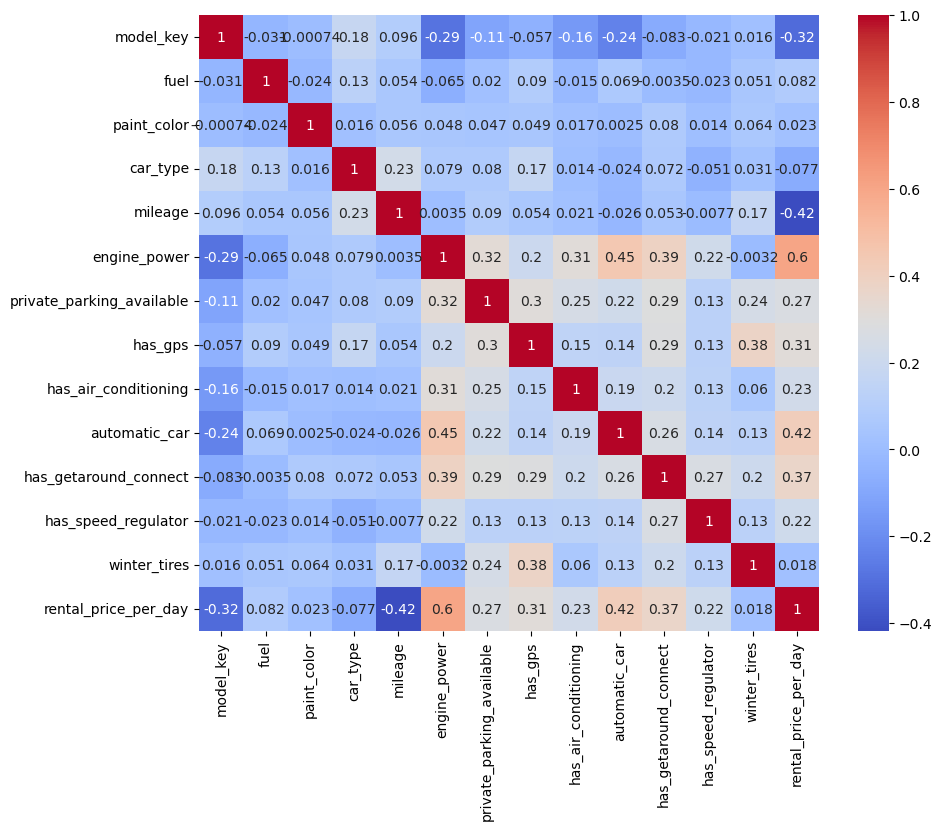

<Figure size 1000x800 with 0 Axes>

In [37]:
#Size heatmap
plt.figure(figsize=(10, 8))

#Calcul Heatmap coefficient
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(10, 8))
plt.show()

In [38]:
coefficients = df_merged.corr()["rental_price_per_day"].abs().sort_values(ascending=False)

# Affichage des coefficients
print(coefficients)

rental_price_per_day         1.000000
engine_power                 0.604219
mileage                      0.417645
automatic_car                0.416093
has_getaround_connect        0.367278
model_key                    0.317485
has_gps                      0.310897
private_parking_available    0.271422
has_air_conditioning         0.229254
has_speed_regulator          0.219054
fuel                         0.082302
car_type                     0.076977
paint_color                  0.023222
winter_tires                 0.018135
Name: rental_price_per_day, dtype: float64


# Correlations according to matrix correlation:

We observe a very good correlation between the target and the power of the engine.

It exist a good correlation between the mileage of the car and the label.

Automatic car also has a good correlation with the label.


In [39]:
# Export the database to csv
# Let's export database
df_pricing.to_csv('clean_pricing_project.csv', index=False)